# Template matching

In [1]:
import cv2
from matplotlib import pyplot as plt

plt.gray()

<Figure size 432x288 with 0 Axes>

The goal of template matching is to find the location of a template image in a larger image. Thus to perform template matching, or block matching, we initially need an image containing some feature (e.g. an object) to locate.
For this exercise we will be using one of the images of a playtable and for simplicity we will be focusing on single channel images (grayscale images).

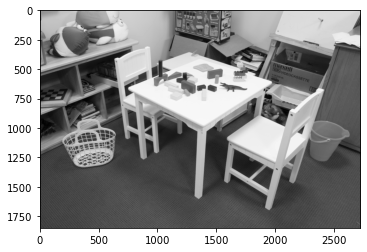

In [2]:
img = cv2.imread("playtable_left.png")

img_left = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_left)


The second thing we need is a template containing the features or object that we are interested in locating.

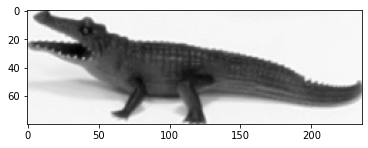

In [3]:
template = cv2.imread('crocodile.png')
# Though the template is saved as a single channel (grayscale) image, it is loaded as a 3 channel image with identical channels.
# Therefore we can just take any of the three channels
template = template[...,0]
plt.imshow(template)

With both an image and a template, we can perform template matching to locate the crocodile in the large playtable image.

## Exercise 1.1
We will use a normalized cross correlation as a similarity metric defined [here](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#which-are-the-matching-methods-available-in-opencv).

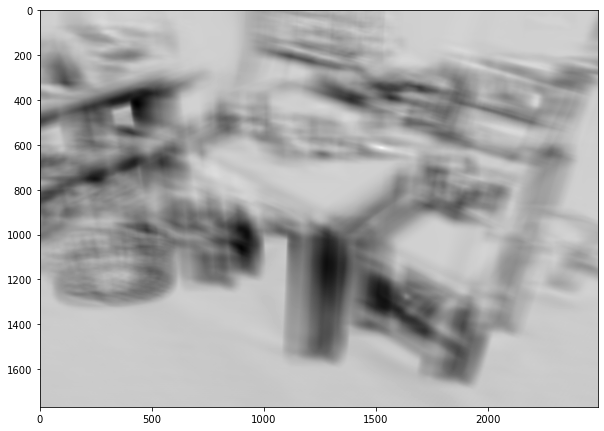

In [4]:
res = cv2.matchTemplate(gray_left, template, cv2.TM_CCORR_NORMED)
plt.figure(figsize = (10,10))
plt.imshow(res, 'gray')

What does the above image tell us?

We can use the minMaxLoc() function to find the location which best matches our template and draw a rectangle around it. 

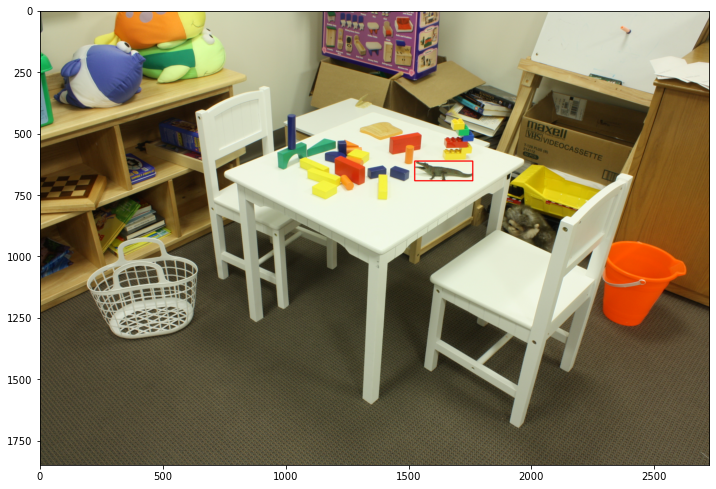

In [5]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

crocodile = cv2.rectangle(img_left.copy(), top_left, bottom_right, (255,0,0), 3)

plt.figure(figsize=(12,12))
plt.imshow(crocodile)


## Exercise 1.2
Use template matching to locate the orange bucket in the center-right side of `playtable_left.png`

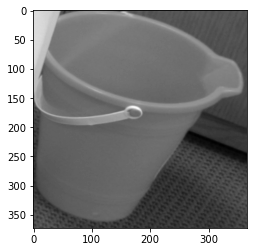

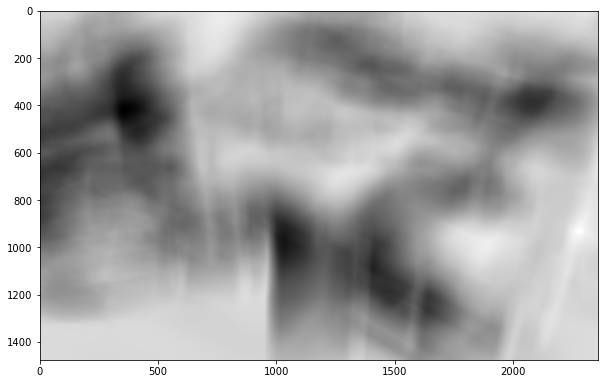

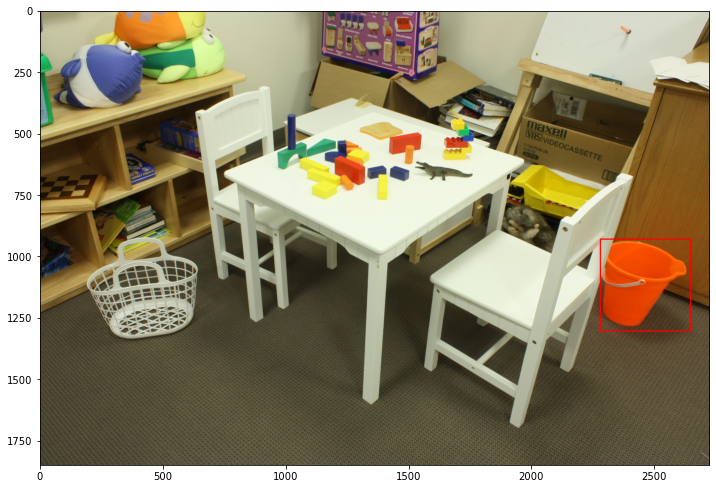

In [24]:
bucket = cv2.imread('bucket.png')
#bucket = bucket[...,0]

bucket = cv2.cvtColor(bucket, cv2.COLOR_BGR2RGB)
bucket = cv2.cvtColor(bucket, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(bucket)


res = cv2.matchTemplate(gray_left, bucket, cv2.TM_CCORR_NORMED)
plt.figure(figsize = (10,10))
plt.imshow(res, 'gray')


min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + bucket.shape[1], top_left[1] + bucket.shape[0])

crocodile = cv2.rectangle(img_left.copy(), top_left, bottom_right, (255,0,0), 3)

plt.figure(figsize=(12,12))
plt.imshow(crocodile)

## Exercise 1.3
In the above examples, we used normalized cross correlation as the metric to create our similarity map. You can find the mathematical description [here](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#which-are-the-matching-methods-available-in-opencv). In the same link you will also find other similarity metrics.

Try to use the squared difference `cv2.TM_SQDIFF` instead and compare it to the above result.

**Hint:** plot the results next to each other.

**NOTE:** Based on the definitions in the above link, we see that `cv2.TM_SQDIFF` gives a low value for a good match, i.e. we have to look for the lowest value in the similarity map instead of the maximum value like we did with `cv2.TM_CCORR_NORMED`.

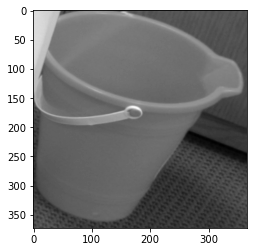

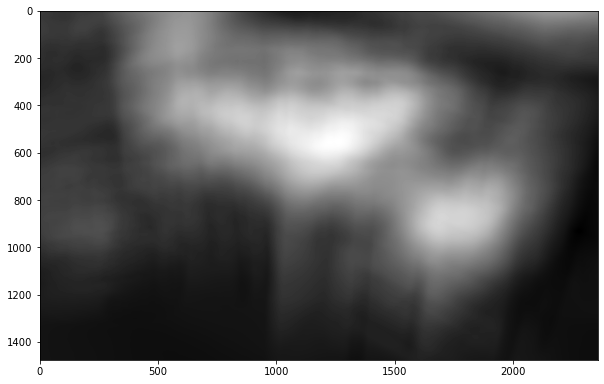

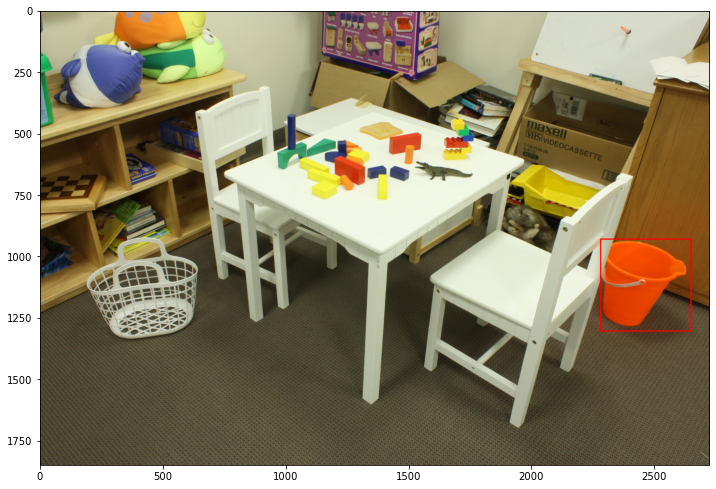

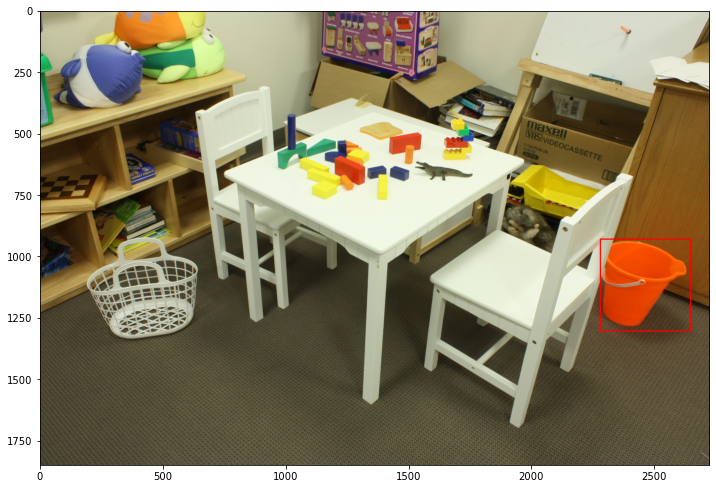

In [28]:
bucket = cv2.imread('bucket.png')
#bucket = bucket[...,0]

bucket = cv2.cvtColor(bucket, cv2.COLOR_BGR2RGB)
bucket = cv2.cvtColor(bucket, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(bucket)


res = cv2.matchTemplate(gray_left, bucket, cv2.TM_SQDIFF)
plt.figure(figsize = (10,10))
plt.imshow(res, 'gray')


min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + bucket.shape[1], top_left[1] + bucket.shape[0])

crocodile2 = cv2.rectangle(img_left.copy(), top_left, bottom_right, (255,0,0), 3)

plt.figure(figsize=(12,12))
plt.imshow(crocodile2)
plt.figure(figsize=(12,12))
plt.imshow(crocodile)
